# Section 1: Importing and Summarizing Data

You can type Python code in the code cells following the instruction cells to solve the exercises. 

You can also use the IPython Shell interactively. Go to View (on the menubar) and click terminal or press `Ctrl` + ` to open the terminal. Once terminal is open, type py and hit Enter. This will launch interactive python cell. You can write python statements and hit Enter to see the output in the next line in the cell.

## Exercise 1: Read and explore your data

In this lab, you'll explore a dataset containing information on a university's recent graduates for each department stored in `"recent_grads.csv"` file. In this exercise, you'll read in this data using Python's `pandas` module.
### Instructions

- Import `pandas` as `pd`.
- Read in the data from `recent_grads_url` (which is a CSV file) and assign it to a variable called `recent_grads`.
- Print the shape of `recent_grads`.


In [ ]:
# Import pandas 
import pandas as pd

# Use pandas to read in recent_grads.csv
recent_grads = pd.read_csv('recent_grads.csv', index_col=0)

# Print the shape
print(recent_grads.shape)

(173, 20)


## Exercise 2: Exploring Your Data

Now you'll perform some data exploration using the Python `pandas` module. To get a sense of the data, you'll output statistics such as mean, median, count, and percentiles.

The DataFrame `recent_grads` is still in your workspace.
### Instructions

- Print the `.dtypes` of your data so that you know what each column contains.
- Output basic summary statistics using a single `pandas` function.
- With the same function from before, summary statistics for all columns that aren't of type `object`.



In [ ]:
# Print .dtypes
print(recent_grads.dtypes)
print("----------------------------------")
# Output summary statistics
print(recent_grads.describe())
print("----------------------------------")
# Exclude data of type object
print(recent_grads.describe(exclude=['object']))

major_code                int64
major                    object
major_category           object
total                     int64
sample_size               int64
men                       int64
women                     int64
sharewomen              float64
employed                  int64
full_time                 int64
part_time                 int64
full_time_year_round      int64
unemployed                int64
unemployment_rate       float64
median                   object
p25th                    object
p75th                    object
college_jobs              int64
non_college_jobs          int64
low_wage_jobs             int64
dtype: object
----------------------------------
        major_code          total  sample_size            men          women  \
count   173.000000     173.000000   173.000000     173.000000     173.000000   
mean   3879.815029   39167.716763   356.080925   16637.358382   22530.358382   
std    1687.753140   63354.613919   618.361022   28063.394844   40966.3

## Exercise 3: Replacing Missing Values

There are some missing values in the dataset that are coded as a string. You'll update these to a value that Python understands as "missing."

The list `columns` contains the names of the columns you'll be working with in this exercise.
### Instructions

- Look at the `dtypes` of the columns in `columns` to make sure that the data is numeric.
- It looks like a string is being used to encode missing values. Use the `.unique()` method to figure out what the string is.
- Search for missing values in the median, p25th, and p75th columns.
- Replace the found missing values with a `NaN` value, using `numpy`'s `np.nan`.

In [ ]:
import numpy as np
# Names of the columns we're searching for missing values 
columns = ['median', 'p25th', 'p75th']

# Take a look at the dtypes
print(recent_grads[columns].dtypes)

# Find how missing values are represented
print(recent_grads["median"].unique())

# Replace missing values with NaN
for column in columns:
    recent_grads.loc[recent_grads[column] == "UN", column] = np.nan

print(recent_grads["median"].unique())
print(recent_grads[columns].dtypes)

#convert to numeric
df = pd.DataFrame(recent_grads, columns=columns)
df[columns] = df[columns].astype(float)
print(df.dtypes)

median    object
p25th     object
p75th     object
dtype: object
['110000' '75000' '73000' '70000' '65000' 'UN' '62000' '60000' '58000'
 '57100' '57000' '56000' '54000' '53000' '52000' '51000' '50000' '48000'
 '47000' '46000' '45000' '44700' '44000' '42000' '41300' '41000' '40100'
 '40000' '39000' '38400' '38000' '37500' '37400' '37000' '36400' '36200'
 '36000' '35600' '35000' '34000' '33500' '33400' '33000' '32500' '32400'
 '32200' '32100' '32000' '31500' '31000' '30500' '30000' '29000' '28000'
 '27500' '27000' '26000' '25000' '23400' '22000']
['110000' '75000' '73000' '70000' '65000' nan '62000' '60000' '58000'
 '57100' '57000' '56000' '54000' '53000' '52000' '51000' '50000' '48000'
 '47000' '46000' '45000' '44700' '44000' '42000' '41300' '41000' '40100'
 '40000' '39000' '38400' '38000' '37500' '37400' '37000' '36400' '36200'
 '36000' '35600' '35000' '34000' '33500' '33400' '33000' '32500' '32400'
 '32200' '32100' '32000' '31500' '31000' '30500' '30000' '29000' '28000'
 '27500' '2700

## Exercise 4: Select a Column

Python's `pandas` module allows you to select a specific column from a DataFrame, which is especially useful for when you only need to manipulate one piece of data. In this exercise, you'll select the `sharewomen` column, which shows the percentage of women for a given department.

The DataFrame `recent_grads` is still in your workspace.
### Instructions

- Select the `sharewomen` column from `recent_grads` and assign this to a variable named `sw_col`.
- Output the first 5 rows of `sw_col`.


In [ ]:
# Select sharewomen column
sw_col = recent_grads["sharewomen"]

# Output first five rows
print(sw_col.head(5))

rank
1    0.120564
2    0.101852
3    0.153037
4    0.107313
5    0.341631
Name: sharewomen, dtype: float64


## Exercise 5: Column Maximum Value

Now that you've selected the `sharewomen` column, you'll use `numpy` to output its maximum value.

The variable `sw_col` you created in the last exercise is still available in your workspace.
### Instructions

- Import `numpy` as `np`.
- Using a `numpy` built-in function, find the maximum value of the `sharewomen` column and assign this value to the variable `max_sw`.
- Print the value of `max_sw`


In [ ]:
# Import numpy
import numpy as np

# Use max to output maximum values
np_sw_col = np.array(sw_col)
max_sw = np_sw_col.max()

# Print column max
print(max_sw)

0.968953683


## Exercise 6: Selecting a Row

While you know what the maximum percentage of women in a department is, which department is this? You'll output this information by filtering the dataset with `pandas`.

The variables `sw_col` and `max_sw` are still in your workspace.
### Instructions

- Output the row of data for the department that has the largest percentage of women.


In [ ]:
#sw_col = recent_grads['sharewomen']

# Find the maximum value of the sharewomen column using numpy
max_sw = np.max(sw_col)

# Find the index of the row with the maximum sharewomen value
max_sw_index = sw_col.argmax()

# Select the row with the index of the maximum sharewomen value
max_sw_row = recent_grads.loc[max_sw_index]

# Print the row of data for the department with the highest percentage of women
print(max_sw_row)

In [ ]:
# Output the row containing the maximum percentage of women
dataframe = pd.DataFrame(recent_grads)
print(dataframe[sw_col == max_sw])

      major_code                        major             major_category  \
rank                                                                       
163         5502  ANTHROPOLOGY AND ARCHEOLOGY  Humanities & Liberal Arts   

      total  sample_size   men  women  sharewomen  employed  full_time  \
rank                                                                     
163   38844          247  1167  36422    0.968954     29633      20147   

      part_time  full_time_year_round  unemployed  unemployment_rate median  \
rank                                                                          
163       14515                 13232        3395           0.102792  28000   

      p25th  p75th  college_jobs  non_college_jobs  low_wage_jobs  
rank                                                               
163   20000  38000          9805             16693           6866  


## Exercise 6: Converting a DataFrame to Numpy Array

Since `numpy` is such a powerful Python module, this exercise asks you to convert a `pandas` DataFrame to a `numpy` array to then utilize a statistics metric available through `numpy` in the next exercise.
### Instructions

- Select the columns `unemployed` and `low_wage_jobs` from `recent_grads`, then convert them to a `numpy` array. Save this as `recent_grads_np`.
- Print the type of `recent_grads_np` to see that it is a `numpy` array.


In [ ]:
# Convert to numpy array
recent_grads_np = np.array(recent_grads[["unemployed", "low_wage_jobs"]])

# Print the type of recent_grads_np
print(type(recent_grads_np))
print(recent_grads_np)

<class 'numpy.ndarray'>
[[   37   193]
 [   85    50]
 [   16     0]
 [   40     0]
 [ 1672   972]
 [  400   244]
 [  308   259]
 [   33   220]
 [ 4650  3253]
 [ 3895  3170]
 [ 2275   980]
 [  794   372]
 [ 1019   789]
 [   78    81]
 [   23   263]
 [  589   524]
 [  699   640]
 [ 2859  3192]
 [  170   137]
 [   11   144]
 [ 6884  5144]
 [  338   485]
 [  824   696]
 [   70    70]
 [ 1015   708]
 [ 3270  2899]
 [ 1042   703]
 [  504   285]
 [  597   365]
 [  670   340]
 [  308   260]
 [  163   142]
 [  286   755]
 [   49    49]
 [ 8497  6193]
 [ 9413  9910]
 [11452 10653]
 [ 1165  1284]
 [  129   480]
 [  137   124]
 [12411 10886]
 [ 2884  4569]
 [ 2934  1672]
 [ 1282  1823]
 [  505  1002]
 [  639   608]
 [  401   343]
 [  385   357]
 [  107    93]
 [   99   186]
 [   74   245]
 [  407  1270]
 [    0    25]
 [  419   263]
 [  223   135]
 [   88     0]
 [ 2271  2499]
 [14946 27320]
 [ 4366  4221]
 [ 2092  3046]
 [  977  1121]
 [ 1067  1168]
 [ 1150  1758]
 [  649  1362]
 [  178   839]
 

## Exercise 7: Correlation Coefficient

You have some suspicion that there's a relationship between the `low_wage_jobs` and `unemployment_rate` columns, so you decide to use `numpy` to calculate the correlation coefficient.
### Instructions

- Calculate the correlation matrix of the `numpy` array `recent_grads_np`.


In [ ]:
# Calculate correlation matrix
print(np.corrcoef(recent_grads_np[:,0], recent_grads_np[:,1]))

[[1.         0.95538815]
 [0.95538815 1.        ]]


# Section 2: Manipulating Data

## Exercise 1: Creating Columns I

If you look at the dataset, you'll notice that while there's a column which shows the percentage of women in each department, there is no column which shows the percentage of men.
### Instructions

- Create a new column named `sharemen`, that contains the percentage of men for a given department by dividing the number of men by the total number of students for each department.


In [ ]:
# Add sharemen column
recent_grads['sharemen'] = recent_grads['men'] / recent_grads['total']

print(recent_grads["sharemen"])

rank
1      0.879436
2      0.898148
3      0.846963
4      0.892687
5      0.658369
         ...   
169    0.362707
170    0.182901
171    0.200141
172    0.201254
173    0.122040
Name: sharemen, Length: 173, dtype: float64


## Exercise 2: Select Row with Highest Value

Remember how you found the row of data with the highest percentage of women? Now you'll find the row that corresponds to the department with the highest rate of men.

The module `numpy` has been imported under the alias `np` for you.
### Instructions

- Using numpy, find the maximum value for the percentage of men and call this variable max_men.
- Select the row that has the percentage of men which corresponds to max_men.


In [ ]:
import numpy as np
# Find the maximum percentage value of men
sharemen_np = np.array([recent_grads["sharemen"]])
max_men = sharemen_np.max()
print(max_men) 

# Output the row with the highest percentage of men
print(dataframe[recent_grads["sharemen"] == max_men])

97.32960199004975
      major_code                                       major major_category  \
rank                                                                          
121         2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION      Education   

      total  sample_size    men  women  sharewomen  employed  full_time  ...  \
rank                                                                     ...   
121     804            5  78253  63698    0.448732       703        733  ...   

      full_time_year_round  unemployed  unemployment_rate  median  p25th  \
rank                                                                       
121                    504           0                0.0   34000  29000   

      p75th college_jobs  non_college_jobs  low_wage_jobs   sharemen  
rank                                                                  
121   35000          346               206            111  97.329602  

[1 rows x 21 columns]


## Exercise 3: Creating columns II

Eventually you want to figure out which departments are most balanced between men and women. To accomplish this, you'll add a new column that reports the difference in percentages between men and women.
### Instructions

- Add a column named `gender_diff` that reports how much higher the rate of women is than the rate of men.


In [ ]:
# Add gender_diff column
recent_grads['gender_diff'] = recent_grads['sharewomen'] - recent_grads['sharemen']
print(recent_grads['gender_diff'])

rank
1     -0.758871
2     -0.796296
3     -0.693925
4     -0.785374
5     -0.316739
         ...   
169    0.274587
170    0.634198
171    0.599718
172    0.597492
173    0.755920
Name: gender_diff, Length: 173, dtype: float64


## Exercise 4: Updating columns

Your data for the `gender_diff` column currently consists of negative and positive values, which depend on which group of people (women or men) have a higher percentage. You want to find the five departments with the most balanced gender ratios, but first you decide to make your life easier by replacing the values in the `gender_diff` column with their respective absolute values.
### Instructions

- Use `numpy` and `pandas` to convert each value in the `gender_diff` column to its absolute value.
- Output the five departments with the most balanced gender ratios.


In [ ]:
# Make all gender difference values positive
recent_grads['gender_diff'] = np.abs(recent_grads['gender_diff'])

# Find the 5 rows with lowest gender rate difference
print(recent_grads.nsmallest(5, 'gender_diff'))

      major_code                                   major     major_category  \
rank                                                                          
9           2414                  MECHANICAL ENGINEERING        Engineering   
75          5003                               CHEMISTRY  Physical Sciences   
38          6205                      BUSINESS ECONOMICS           Business   
66          2599  MISCELLANEOUS ENGINEERING TECHNOLOGIES        Engineering   
79          5506        POLITICAL SCIENCE AND GOVERNMENT     Social Science   

       total  sample_size    men  women  sharewomen  employed  full_time  ...  \
rank                                                                      ...   
9      91227         1029  12953   2105    0.139793     76442      71298  ...   
75     66530          353  32923  33607    0.505141     48535      39509  ...   
38     13302          199   3477   1154    0.249190     10914      10048  ...   
66      8804          125    124      0  

## Exercise 5: Filtering rows

Finally you can filter out for departments which fail the benchmark of a difference of more than 0.30. Since all the values are now positive, you can do this with a simple boolean operator.

You want to find the rows containing departments that are skewed heavily towards men. Using work you've already done, you'll create a new DataFrame that contains this information.

The DataFrame `recent_grads` still has the columns `sharemen` and `gender_diff` that you created in previous exercises.
### Instructions

- Create `diff_30`, a boolean `Series` that is `True` when the corresponding value of `gender_diff` is greater than `0.30` and `False` otherwise.
- Make another boolean Series called `more_men` that's true when the corresponding row in `recent_grads` has more men than women.
- Combine your two `Series` to make one that you can use to select rows that have both more men than women and a value of `gender_diff` greater than 0.30. Save the result as `more_men_and_diff_30`.
- Use this new boolean `Series` to create the DataFrame `fewer_women` that contains only the rows you're interested in.

In [ ]:
# Rows where gender rate difference is greater than .30 
diff_30 = recent_grads["gender_diff"] > .30

# Rows with more men
more_men = recent_grads["sharemen"] > recent_grads["sharewomen"]

# Combine more_men and diff_30
more_men_and_diff_30 = np.logical_and(more_men, diff_30)

# Find rows with more men and and gender rate difference greater than .30
fewer_women = recent_grads[more_men_and_diff_30]
print(fewer_women)

      major_code                                              major  \
rank                                                                  
1           2419                              PETROLEUM ENGINEERING   
2           2416                     MINING AND MINERAL ENGINEERING   
3           2415                          METALLURGICAL ENGINEERING   
4           2417          NAVAL ARCHITECTURE AND MARINE ENGINEERING   
5           2405                               CHEMICAL ENGINEERING   
6           2418                                NUCLEAR ENGINEERING   
8           5001                         ASTRONOMY AND ASTROPHYSICS   
11          2407                               COMPUTER ENGINEERING   
12          2401                              AEROSPACE ENGINEERING   
13          2404                             BIOMEDICAL ENGINEERING   
14          5008                                  MATERIALS SCIENCE   
15          2409          ENGINEERING MECHANICS PHYSICS AND SCIENCE   
16    

## Exercise 6: Grouping with Counts

There are various department categories but no sense of how many departments there are in each category. You'll use `pandas` to gain insight into this information.

In particular, you'll use the `.groupby()` method of `pandas`. This was not introduced to you in the course, but you'll see it very frequently in your data science journey and it's an important method to understand. This set of exercises will extend your `pandas` knowledge by teaching you how to use the `.groupby()` method.

Calls to `.groupby()` have the following three components: the column you want to group, the column you want to aggregate, and the statistic you want to aggregate by. For example, in our dataset, if we wanted to see the percentage of women (`'sharewomen'`) per `'major_category'`, we could leverage a `.groupby` like so: `recent_grads.groupby('major_category')['sharewomen'].mean()`. Here, we are grouping by `'major_category'`, and aggregating `'sharewomen'` by the mean. Give it a try in the IPython Shell if you're curious to see the result!
### Instructions


- Using the `.groupby()` method, group the `recent_grads` DataFrame by `'major_category'` and then count the number of departments per category using `.count()`.



In [ ]:
# Group by major category and count
print(recent_grads.groupby(['major_category']).major_category.count())

major_category
Agriculture & Natural Resources        10
Arts                                    8
Biology & Life Science                 14
Business                               13
Communications & Journalism             4
Computers & Mathematics                11
Education                              16
Engineering                            29
Health                                 12
Humanities & Liberal Arts              15
Industrial Arts & Consumer Services     7
Interdisciplinary                       1
Law & Public Policy                     5
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Name: major_category, dtype: int64


## Exercise 7: Grouping with Counts, Part 2

You want to get a sense of the number of majors with a lot less women, so you'll perform a similar operation as the one from the last exercise.

Use the `fewer_women` DataFrame from a previous exercise.
### Instructions

- Create a DataFrame that groups the departments by major category and shows the number of departments that are skewed in women.



In [ ]:
# Group departments that have less women by category and count
print(fewer_women.groupby(["major_category"]).major_category.count())

major_category
Agriculture & Natural Resources         6
Biology & Life Science                  4
Business                                1
Computers & Mathematics                 5
Education                               5
Engineering                            20
Health                                  1
Humanities & Liberal Arts               1
Industrial Arts & Consumer Services     3
Interdisciplinary                       1
Law & Public Policy                     1
Physical Sciences                       6
Psychology & Social Work                2
Social Science                          4
Name: major_category, dtype: int64


## Exercise 8: Grouping One Column with Means

Similar to the exercise you just completed, you can group rows to output the means of different groups within a column.

The column `gender_diff` is still available in the `recent_grads` DataFrame.
### Instructions

- Write code that outputs the average gender percentage difference by major category.


In [ ]:
# Report average gender difference by major category
print(recent_grads.groupby(["major_category"]).gender_diff.mean())

major_category
Agriculture & Natural Resources        4.511111
Arts                                   0.308747
Biology & Life Science                 4.785277
Business                               0.318304
Communications & Journalism            0.483868
Computers & Mathematics                0.700728
Education                              6.869082
Engineering                            1.296387
Health                                 0.450257
Humanities & Liberal Arts              0.540437
Industrial Arts & Consumer Services    2.474325
Interdisciplinary                      0.320397
Law & Public Policy                    0.281993
Physical Sciences                      1.556373
Psychology & Social Work               5.719239
Social Science                         1.695479
Name: gender_diff, dtype: float64


## Exercise 9: Grouping Two Columns with Means

You can expand the previous operation to include two columns and output the means for each. To accomplish this, modify the code you just wrote.
Instructions

- Write a query that outputs the mean number of `'low_wage_jobs'` and average `'unemployment_rate'` grouped by `'major_category'`.


In [ ]:
# Find average number of low wage jobs and unemployment rate of each major category
dept_stats = recent_grads.groupby(['major_category'])['low_wage_jobs', 'unemployment_rate'].mean()
print(dept_stats)

                                     low_wage_jobs  unemployment_rate
major_category                                                       
Agriculture & Natural Resources         789.900000           0.056328
Arts                                   7514.500000           0.090173
Biology & Life Science                 3053.000000           0.060918
Business                               9752.923077           0.071064
Communications & Journalism           12398.750000           0.075538
Computers & Mathematics                1466.909091           0.084256
Education                              2554.375000           0.051702
Engineering                             864.793103           0.063334
Health                                 2605.833333           0.065920
Humanities & Liberal Arts              6282.666667           0.081008
Industrial Arts & Consumer Services    3798.571429           0.056083
Interdisciplinary                      1061.000000           0.070861
Law & Public Policy 

C:\Users\Poobharathii\AppData\Local\Temp\ipykernel_9056\4254180986.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dept_stats = recent_grads.groupby(['major_category'])['low_wage_jobs', 'unemployment_rate'].mean()


# Section 3: Visualizing Data

## Exercise 1: Plotting Scatterplots

Now that you've calculated the correlation coefficient between the `low_wage_jobs` and `unemployment_rate` columns, you want to create a visualization to effectively display this relationship. You'll use `matplotlib` to create a scatterplot of these two columns.

The DataFrame `dept_stats` is available in your workspace again, and the columns `low_wage_jobs` and `unemployment_rate` have been extracted into variables of the same name.
### Instructions

- Import `matplotlib.pyplot` with the alias `plt`.
- Create a scatter plot between `unemployment_rate` and `low_wage_jobs` per major category.
- Label the x axis with `'Unemployment rate'`.
- Label the y axis with `'Low pay jobs'`.



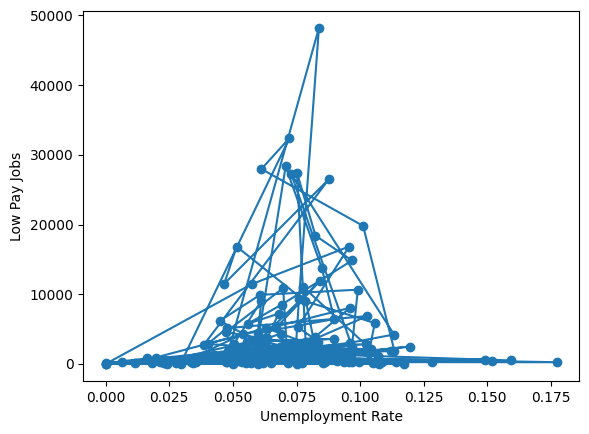

In [ ]:
low_wage_jobs = recent_grads['low_wage_jobs']
unemployment_rate = recent_grads['unemployment_rate']

# Import matplotlib
import matplotlib.pyplot as plt

# Create scatter plot
plt.plot(unemployment_rate, low_wage_jobs)
plt.scatter(unemployment_rate, low_wage_jobs)

# Label x axis
plt.xlabel("Unemployment Rate")

# Label y axis
plt.ylabel("Low Pay Jobs")

# Display the graph 
plt.show()

# Exercise 2: Modifying Plot Colors

The default settings for `matplotlib` may not be what you hope to present to others, so you decide to customize your plot for low wages versus unemployment rate.

Use the `pandas` DataFrame `dept_stats` again.
### Instructions

- Create the scatterplot visualization between the unemployment rate and number of low wage jobs per major category using the `.plot()` method.
- Customize this scatterplot so that the points are red triangles by setting the `color` argument to `"r"` and the marker argument `^`.
- Display the plot you've created!



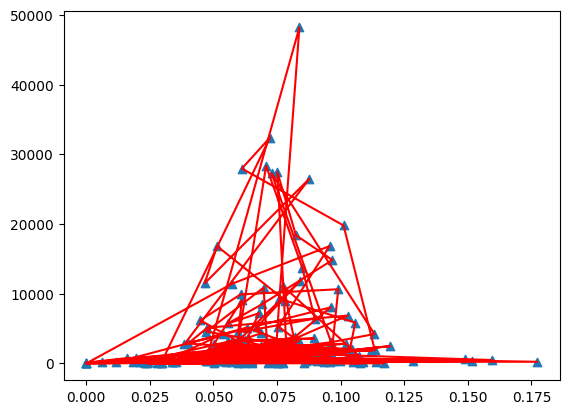

In [ ]:
# Plot the red and triangle shaped scatter plot  
plt.plot(unemployment_rate, low_wage_jobs, color="r")
plt.scatter(unemployment_rate, low_wage_jobs, marker="^")

# Display the visualization
plt.show()

## Exercise 3: Plotting Histograms

Now that you've taken a look at that scatterplot, you want to go back to the `sharewomen` column that you were working with earlier. Specifically, you want to get an idea of how the values of `sharewomen` are distributed. This means you want to plot a histogram. For your convenience, the `sharewomen` column has been extracted from the recent_grads DataFrame into a variable called `sharewomen`.

### Instructions

- Use `matplotlib` to create a histogram of `sharewomen`.
- Show the plot you created.


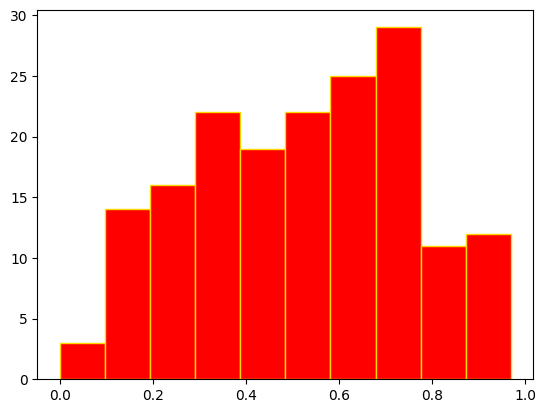

In [ ]:
sharewomen = recent_grads['sharewomen']
# Plot a histogram of sharewomen
plt.hist(sharewomen, color="r", edgecolor="gold")

# Show the plot
plt.show()

## Exercise 4: Plotting with pandas

In Python, there are several different ways to create visualizations. In fact, `pandas` has its own visualization capabilities, all of which are built on top of `matplotlib`! For example, you could have created the histogram from the previous exercise using `recent_grads.sharewomen(kind="hist")` instead of `plt.hist(recent_grads.sharewomen)`.

Which approach you prefer comes down to personal preference - when working with DataFrames, it is advantageous to use `pandas`' plotting capabilities because the code tends to be less verbose.

Here, you will practice creating the plots from the previous exercises using `pandas` instead of `matplotlib`. All `pandas` plots are created using the `.plot()` method on a DataFrame. Inside `.plot()`, you can specify which plot you want to create using the `kind` parameter. For example, `kind= 'hist'` would create a histogram, `kind='scatter'` would create a scatter plot, and so on.
### Instructions
- Use the `.plot()` method with `kind='scatter'` on the `dept_stats` DataFrame to create a scatter plot with `'unemployment_rate'` on the x-axis and `'low_wage_jobs'` on the y-axis.

- Now, create a histogram of the `sharewomen` column of the `recent_grads` DataFrame. 

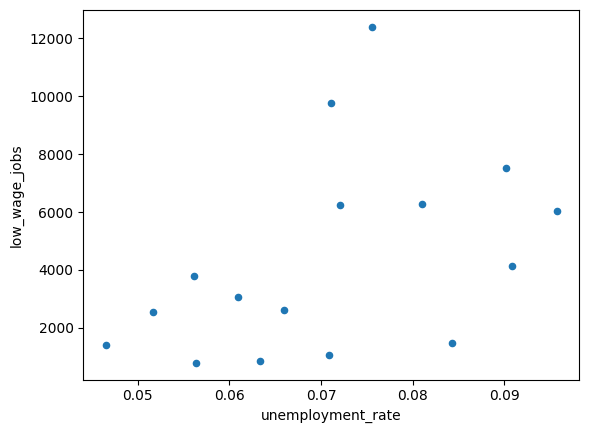

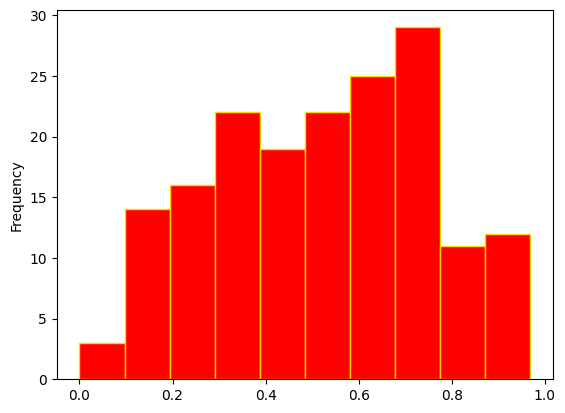

In [ ]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot
dept_stats.plot(kind='scatter', x='unemployment_rate', y='low_wage_jobs')
plt.show()

# Create histogram
recent_grads.sharewomen.plot(kind='hist', color="red", edgecolor="gold")
plt.show()

## Congratulations

You did it! You have successfully completed the exercises. 

Save your work by pressing `Ctrl + s` and head over to the next video in the course.

Don't forget to Turn Off the Lab. Remember - Don't shut down the machine, but click on the x icon on top right to close the lab session.